<a href="https://colab.research.google.com/github/suriyah1310/6G7V0026_2223_9F/blob/main/Big_data_Suriyah_1st_Research_Hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Installing relevant software & dictionaries:


In [7]:
#Setting up Spark and all relevant dictionaries: 
print("\nWelcome to 1st Research Hypothesis work by Suriyah Uthayakumar (22455939)")
!ls

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
!tar -xf spark-3.3.2-bin-hadoop3.tgz
!ls -alt


Welcome to 1st Research Hypothesis work by Suriyah Uthayakumar (22455939)
drive  sample_data
--2023-04-23 03:25:10--  https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 88.99.95.219, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299360284 (285M) [application/x-gzip]
Saving to: ‘spark-3.3.2-bin-hadoop3.tgz’

spark-3.3.2-bin-had 100%[===================>] 285.49M  23.5MB/s    in 13s     

2023-04-23 03:25:23 (21.9 MB/s) - ‘spark-3.3.2-bin-hadoop3.tgz’ saved [299360284/299360284]

total 292372
drwxr-xr-x  1 root root      4096 Apr 23 03:25 .
drwx------  5 root root      4096 Apr 23 03:21 drive
drwxr-xr-x  1 root root      4096 Apr 23 03:17 ..
drwxr-xr-x  1 root root      4096 Apr 19 13:37 sample_data
drwxr-xr-x  4 root root      4096 Apr 19 13:36 .config
-rw-r--r--  

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# TFL open data for the year 2014 London bike hire file is downloaded:
!wget https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
!unzip cyclehireusagestats-2014.zip

--2023-04-23 03:29:21--  https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
Resolving cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)... 104.16.101.13, 104.16.100.13
Connecting to cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)|104.16.101.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225215129 (215M) [application/zip]
Saving to: ‘cyclehireusagestats-2014.zip’

cyclehireusagestats 100%[===================>] 214.78M   152MB/s    in 1.4s    

2023-04-23 03:29:23 (152 MB/s) - ‘cyclehireusagestats-2014.zip’ saved [225215129/225215129]

Archive:  cyclehireusagestats-2014.zip
  inflating: 1. Journey Data Extract 05Jan14-02Feb14.csv  
  inflating: 10a. Journey Data Extract 14Sep14-27Sep14.csv  
  inflating: 10b. Journey Data Extract 28Sep14-11Oct14.csv  
  inflating: 11a. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 11b. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 12a. Journey Data Extract 09Nov14-06Dec14.csv  
  i

In [10]:
!ls

'10a. Journey Data Extract 14Sep14-27Sep14.csv'
'10b. Journey Data Extract 28Sep14-11Oct14.csv'
'11a. Journey Data Extract 12Oct14-08Nov14.csv'
'11b. Journey Data Extract 12Oct14-08Nov14.csv'
'12a. Journey Data Extract 09Nov14-06Dec14.csv'
'12b. Journey Data Extract 09Nov14-06Dec14.csv'
'13a. Journey Data Extract 07Dec14-21Dec14.csv'
'13b. Journey Data Extract 22Dec14-03Jan15.csv'
'14. Journey Data Extract 08Dec13-04Jan14.csv'
'1. Journey Data Extract 05Jan14-02Feb14.csv'
'2. Journey Data Extract 03Feb14-01Mar14.csv'
'3. Journey Data Extract 02Mar14-31Mar14.csv'
'4. Journey Data Extract 01Apr14-26Apr14.csv'
'5. Journey Data Extract 27Apr14-24May14.csv'
'6. Journey Data Extract 25May14-21Jun14.csv'
'7. Journey Data Extract 22Jun14-19Jul14.csv'
'8a Journey Data Extract 20Jul14-31Jul14.csv'
'8b Journey Data Extract 01Aug14-16Aug14.csv'
'9a Journey Data Extract 17Aug14-31Aug14.csv'
'9b Journey Data Extract 01Sep14-13Sep14.csv'
 cyclehireusagestats-2014.zip
 drive
 sample_data
 spark-3.3.2-

In [12]:
#installing findspark 
!pip3 install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"
import findspark
findspark.init()
from pyspark import SparkConf, SparkContext
# Spark is started. 2 cores used:
spark_conf = SparkConf().setMaster('local[2]').setAppName('MyApp')
sc = SparkContext(conf=spark_conf)
# Importing pyspark SQL for queries: 
from pyspark.sql import *
from pyspark.sql.functions import *

# Spark Session is started: 
# "SparkSession" and "sc" are key handles in to Spark API
##SparkSession.builder.getOrCreate()
spark = SparkSession.builder.appName("bikes").getOrCreate()

# Section 2: Load File & Priliminary Analysis

## Defining Spring data: 

In [14]:
# Defining Spring : 
# By researching (metoffice.gov.uk), the Spring season is defined as the period between 20 March'14 - 21 June'14. 

# This data is present in 4 different files namely, 
# 3.* (02 Mar - 31 Mar)
# 4.* (01 April - 26 April)
# 5.* (27 April - 24 May)
# 6.* (25 May - 21 June)

# Reading these files into a new dataframe called spring14_df


spring14_df = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load(['./3.*csv', './4.*csv', './5.*csv', './6.*csv' ]))

print("The Spring (including 02-19Mar) dataframe has", spring14_df.count(), " entries")

The Spring (including 02-19Mar) dataframe has 3146046  entries


In [61]:
# Printing the schema to check the column details: 

spring14_df.printSchema()

root
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- StartStation Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)



In [62]:
# Checking these extra columns if they may need

spring14_df[["_c9", "_c10", "_c11"]].distinct().show()

+----+----+----+
| _c9|_c10|_c11|
+----+----+----+
|null|null|null|
+----+----+----+



In [63]:
# Dropping these columns:

columns_to_drop = ["_c9", "_c10", "_c11"]
spring14_df = spring14_df.drop(*columns_to_drop)

In [64]:
spring14_df.printSchema()

root
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- StartStation Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)



In [65]:
# The previous dataframe also has data of the period 02 Mar - 19 Mar'14 which has to be filtered. 
# As the Spring is defined from 20 March. 

# conversion to expected timestamp format so can filter, and alias so easily refer to 'start'
newspring_df = spring14_df.select(to_timestamp(col("Start Date"), format="dd/MM/yyyy HH:mm").alias("start"), "Duration", "Bike Id")

# Filtering the data of the period 02Mar-19Mar from the dataframe: 
# By taking the data after 23.59 Hours of 19 March which will fetch the data from 20 March onwards until 21 June'14. 

spring_df = newspring_df.filter(newspring_df.start > "2014-03-19 23:59:59")
spring_df.count()

2691350

In [66]:
# Checking whether the filter correctly worked. We should see the data only from 20 March onwards. (ascending = True)
# Until 21 June 2014. (ascending = False)
print("The spring data starts from 20 March 2014")
spring_df.sort("start", ascending = True).show(5)

print("The spring data ends at 21 June 2014")
spring_df.sort("start", ascending = False).show(5)

The spring data starts from 20 March 2014
+-------------------+--------+-------+
|              start|Duration|Bike Id|
+-------------------+--------+-------+
|2014-03-20 00:00:00|     300|   3656|
|2014-03-20 00:00:00|     240|   5599|
|2014-03-20 00:01:00|     780|  12203|
|2014-03-20 00:02:00|    1560|    146|
|2014-03-20 00:02:00|     420|   8545|
+-------------------+--------+-------+
only showing top 5 rows

The spring data ends at 21 June 2014
+-------------------+--------+-------+
|              start|Duration|Bike Id|
+-------------------+--------+-------+
|2014-06-21 23:59:00|     300|   5919|
|2014-06-21 23:59:00|    1260|  11067|
|2014-06-21 23:59:00|     240|  11546|
|2014-06-21 23:59:00|     840|  11398|
|2014-06-21 23:59:00|     180|   5588|
+-------------------+--------+-------+
only showing top 5 rows



## Defining Autumn data:

In [17]:
# Defining Autumn : 
# By researching (metoffice.gov.uk), the Autumn season is defined as the period between 23 September'14 - 21 December'14. 

# This data is present in 7 different files namely, 
# 10a.* (14 Sep - 27 Sep)
# 10b.* (28 Sep - 11 Oct)
# 11a.* (12 Oct - 08 Nov)
# 11b.* (12 Oct - 08 Nov (contd.,))
# 12a.* (09 Nov - 06 Dec)
# 12b.* (09 Nov - 06 Dec (contd.,))
# 13a.* (07 Dec - 21 Dec)

# Reading these files into a new dataframe called autumn14_df


autumn14_df = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load(['./10a.*csv', './10b.*csv', './11a.*csv', './11b.*csv', './12a.*csv', './12b.*csv', './13a.*csv' ]))

print("The Autumn (including 14-22 Sep) dataframe has", autumn14_df.count(), " entries")

The Autumn (including 14-22 Sep) dataframe has 3114128  entries


In [67]:
# Printing the schema to check the column details: 

autumn14_df.printSchema()

root
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- StartStation Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)



In [68]:
# Checking these extra columns if they may need

autumn14_df[["_c9", "_c10", "_c11"]].distinct().show()

+----+----+----+
| _c9|_c10|_c11|
+----+----+----+
|null|null|null|
+----+----+----+



In [69]:
# Dropping these columns:

autumn14_df = autumn14_df.drop(*columns_to_drop)

In [70]:
autumn14_df.printSchema()

root
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- StartStation Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)



In [71]:
# The previous dataframe also has data of the period 14 Sep - 22 Sep'14 which has to be filtered. 
# As the Autumn is defined from 23 September. 

# conversion to expected timestamp format so can filter, and alias so easily refer to 'start'
newautumn_df = autumn14_df.select(to_timestamp(col("Start Date"), format="dd/MM/yyyy HH:mm").alias("start"), "Duration", "Bike Id")

# Filtering the data of the period 14 Sep - 22 Sep'14 from the dataframe: 
# By taking the data after 23.59 Hours of 22 September which will fetch the data from 23 September onwards until 21 December'14. 

autumn_df = newautumn_df.filter(newautumn_df.start > "2014-09-22 23:59:59")
autumn_df.count()

2309906

In [72]:
# Checking whether the filter correctly worked. We should see the data only from 23 September onwards. (ascending = True)
# Until 21 December 2014. (ascending = False)
print("The autumn data starts from 23 September 2014")
autumn_df.sort("start", ascending = True).show(5)

print("The autumn data ends at 21 December 2014")
autumn_df.sort("start", ascending = False).show(5)

The autumn data starts from 23 September 2014
+-------------------+--------+-------+
|              start|Duration|Bike Id|
+-------------------+--------+-------+
|2014-09-23 00:00:00|     420|   5554|
|2014-09-23 00:01:00|     240|   8023|
|2014-09-23 00:01:00|    1140|   6667|
|2014-09-23 00:01:00|     540|    445|
|2014-09-23 00:01:00|     600|  11062|
+-------------------+--------+-------+
only showing top 5 rows

The autumn data ends at 21 December 2014
+-------------------+--------+-------+
|              start|Duration|Bike Id|
+-------------------+--------+-------+
|2014-12-21 23:59:00|    1140|   7985|
|2014-12-21 23:58:00|    2940|   9553|
|2014-12-21 23:58:00|     600|    597|
|2014-12-21 23:58:00|    1200|   9946|
|2014-12-21 23:58:00|     300|  10826|
+-------------------+--------+-------+
only showing top 5 rows



# Section 3: Valid Rides Analysis

In [73]:
# import Python libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [74]:
# Converting data to pandas:

spring_pdf = spring_df[["Bike Id", "Duration"]].toPandas()
autumn_pdf = autumn_df[["Bike Id", "Duration"]].toPandas()

In [75]:
#Checking if spring data has any missing values:  

variables = pd.DataFrame(columns = ['Variable', 'Number of unique values', 'Number of nulls'])

for i, var in enumerate(spring_pdf.columns):
  variables.loc[i] = [var, spring_pdf[var].nunique(), spring_pdf[var].isnull().sum()]

variables

,Variable,Number of unique values,Number of nulls
0,Bike Id,11620,0
1,Duration,3050,0


In [76]:
#Checking if autumn data has any missing values: 

A_Variables = pd.DataFrame(columns = ['Variable', 'Number of unique values', 'Number of nulls'])

for i, var in enumerate(autumn_pdf.columns):
  A_Variables.loc[i] = [var, autumn_pdf[var].nunique(), autumn_pdf[var].isnull().sum()]

A_Variables

,Variable,Number of unique values,Number of nulls
0,Bike Id,11647,0
1,Duration,2748,0


In [116]:
# Result: Both the data has no missing values. 

In [77]:
# Checking the mode value of Duration for both the seasons: 

spring_pdf['Duration'].mode()
autumn_pdf['Duration'].mode()

0    480
Name: Duration, dtype: object

In [ ]:
# The results state that the most frequent Duration is 0 for spring data and 480 seconds (8 mins) for autumn data. 

In [78]:
# Deep diven to check whether the Duration has any outliers:

spring_df.agg({"Duration": "min"}).show()
spring_df.agg({"Duration": "max"}).show()
spring_df.agg({"Duration": "mean"}).show()

+-------------+
|min(Duration)|
+-------------+
|            0|
+-------------+

+-------------+
|max(Duration)|
+-------------+
|        99900|
+-------------+

+------------------+
|     avg(Duration)|
+------------------+
|1522.0841287829528|
+------------------+



In [26]:
autumn_df.agg({"Duration": "min"}).show()
autumn_df.agg({"Duration": "max"}).show()
autumn_df.agg({"Duration": "mean"}).show()

+-------------+
|min(Duration)|
+-------------+
|        -1020|
+-------------+

+-------------+
|max(Duration)|
+-------------+
|        99900|
+-------------+

+------------------+
|     avg(Duration)|
+------------------+
|1305.4893575755896|
+------------------+



In [117]:
# The results state that the average Duration of Spring season is roughly around 25 mins whereas for Autumn 22 mins. 
# However, the minimum & maximum duration values still has outliers which has to be cleaned. 

## Outlier removal of Spring data:

In [27]:
# Random sampling of spring data & data converted to pandas for further analysis and to plot. 

sample_spring_df=spring_df.sample(0.001) # 0.001 of 2.7M is roughly 2700
print("spring sample has ", sample_spring_df.count()," elements")

sample_spring_pdf = sample_spring_df[["Bike Id", "Duration"]].toPandas()

spring sample has  2597  elements


In [28]:
sample_spring_pdf.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Bike Id   2597 non-null   object
 1   Duration  2597 non-null   object
dtypes: object(2)
memory usage: 40.7+ KB


In [ ]:
#Since the datatype is "object", converting to "integer" for plotting purposes. 

In [29]:
sample_spring_pdf['Duration'] = sample_spring_pdf['Duration'].astype(int)

In [30]:
sample_spring_pdf['Bike Id'] = sample_spring_pdf['Bike Id'].astype(int)

In [ ]:
#New column "Minutes" is created for better visualization of the plot. This is achieved by dividing the Distance value (seconds) by 60. 

In [31]:
sample_spring_pdf['Minutes'] = sample_spring_pdf['Duration'] / 60

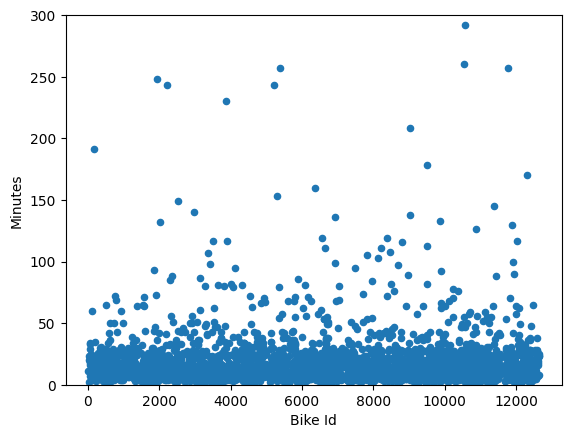

In [32]:
# Scatter plot (Minutes Vs Bike Id)
ax2= sample_spring_pdf.plot(kind="scatter", y="Minutes", x="Bike Id") 
ax2.set_ylim([0, 300])
plt.show()

In [ ]:
# It is infered from the scatter plot of Spring data that most of the ride happens under 50 minutes. 

In [ ]:
# Kernel density distribution plot is plotted to understand the distribution of the Duration of Spring. 

In [33]:
import seaborn as sns
import scipy as sp
sns.set(
    { "figure.figsize": (11,7) },
    palette="Set3",
    style='ticks'
)

<Axes: xlabel='Duration', ylabel='Density'>

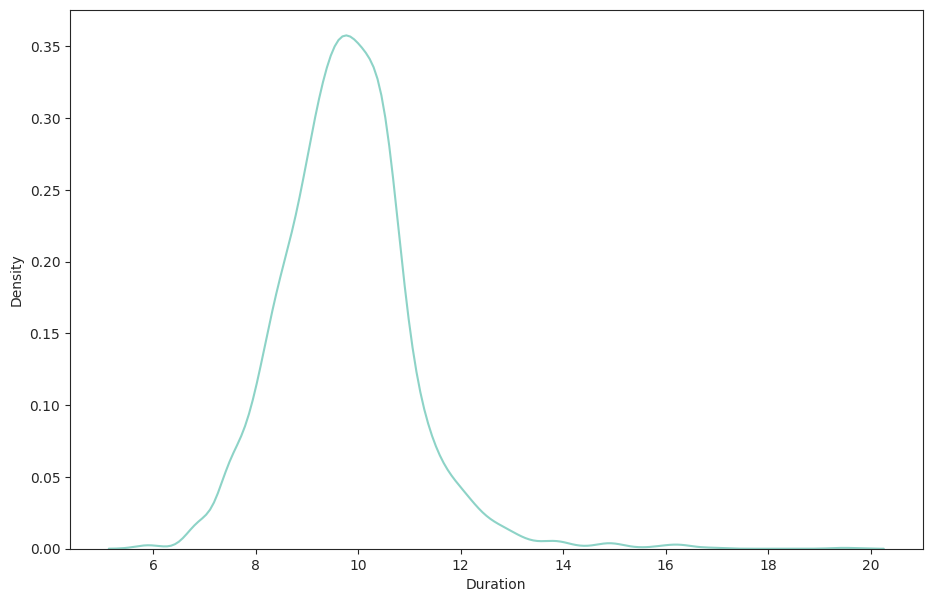

In [34]:
sns.kdeplot(np.log2(sample_spring_pdf.loc[ sample_spring_pdf['Duration']>0, 'Duration']))

In [ ]:
# The results states that during spring season, most duration of rides happened roughly between 2 minutes - 2 hours. ((2^7) - (2^13))

In [35]:
totalspring = spring_df.count()
spring_final_df = spring_df.filter("Duration >= 128").filter("Duration <= 8192")[["Duration"]]
a = spring_final_df.count()
print("After removing outliers, percentage of data considered for Spring i.e, the data in the range of 2 mins to 2.3 hours:" ,(a*100)/totalspring)

After removing outliers, percentage of data considered for Spring i.e, the data in the range of 2 mins to 2.3 hours: 97.26962305162837


In [86]:
spring_final_df.printSchema()

root
 |-- Duration: string (nullable = true)



In [87]:
# To convert string column into integer:

from pyspark.sql.types import IntegerType
spring_final_df = spring_final_df.withColumn("Duration", spring_final_df["Duration"].cast(IntegerType()))

In [88]:
spring_final_df.printSchema()

root
 |-- Duration: integer (nullable = true)



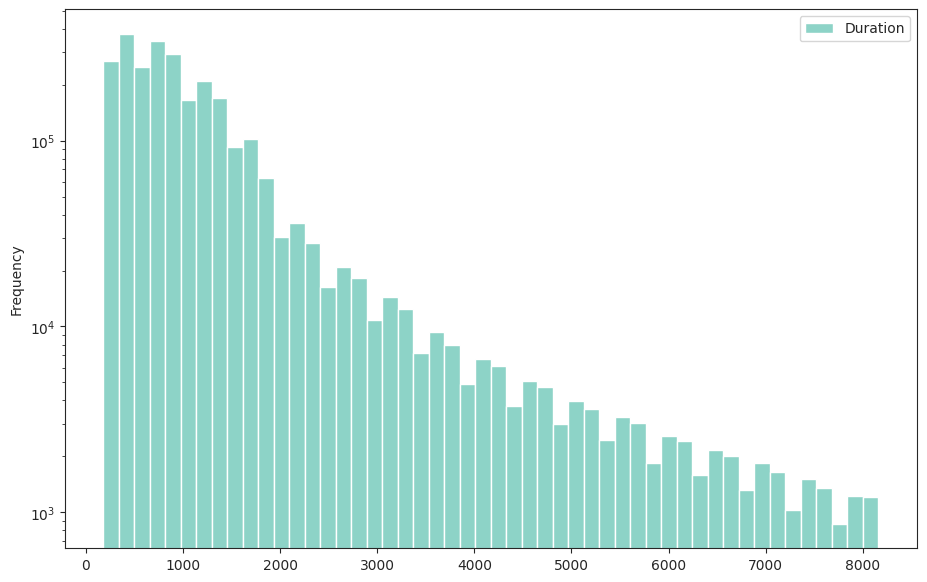

In [36]:
#A Hist plot to understand the skewness of Spring data: 

spring_final_pdf = spring_final_df.toPandas()
spring_final_pdf['Duration'] = spring_final_pdf['Duration'].astype(int)
spring_final_pdf.plot(kind="hist", bins=50, log=True)
plt.show()

In [ ]:
# It is observed that more shorter rides that is less than 15 mins has happened during Spring with an average of nearly 30 mins. 
# It is also seen that very less number of longer rides i.e, more than 1 hour. 

## Outlier removal of Autumn data:

In [37]:
# For better understanding, let's take 2 samples and union them to one dataframe for further analysis. 

Autumn_A_df = autumn_df.sample(0.0005)  # 0.0005 of 2.3M is roughly 1100
print("Autumn_A_ sample has ", Autumn_A_df.count()," elements")

Autumn_B_df = autumn_df.sample(0.0007) # 0.0007 of 2.3M is roughly 1600
print("Autumn_B_ sample has ", Autumn_B_df.count()," elements")


Autumn_A_ sample has  1153  elements
Autumn_B_ sample has  1626  elements


In [38]:
# now combine in to one dataframe (same schema (contrast 'join') but keeping all rows of data)
# this is a UNION
sample_autumn_df = Autumn_A_df.union(Autumn_B_df)
print("Autumn sample count: ",sample_autumn_df.count())
sample_autumn_df.show(5)

Autumn sample count:  2779
+-------------------+--------+-------+
|              start|Duration|Bike Id|
+-------------------+--------+-------+
|2014-09-28 03:29:00|    1380|   5462|
|2014-09-28 11:15:00|     960|   6592|
|2014-09-28 13:38:00|     540|  12825|
|2014-09-28 13:41:00|    1200|   2354|
|2014-09-28 13:56:00|    8160|   1036|
+-------------------+--------+-------+
only showing top 5 rows



In [39]:
# Converting Autumn sample to Pandas & changing the datatype for further investigation: 

sample_autumn_pdf = sample_autumn_df[["Bike Id", "Duration"]].toPandas()
sample_autumn_pdf['Duration'] = sample_autumn_pdf['Duration'].astype(int)
sample_autumn_pdf['Bike Id'] = sample_autumn_pdf['Bike Id'].astype(int)

In [40]:
#Adding a Minutes column: 
sample_autumn_pdf['Minutes'] = sample_autumn_pdf['Duration'] / 60

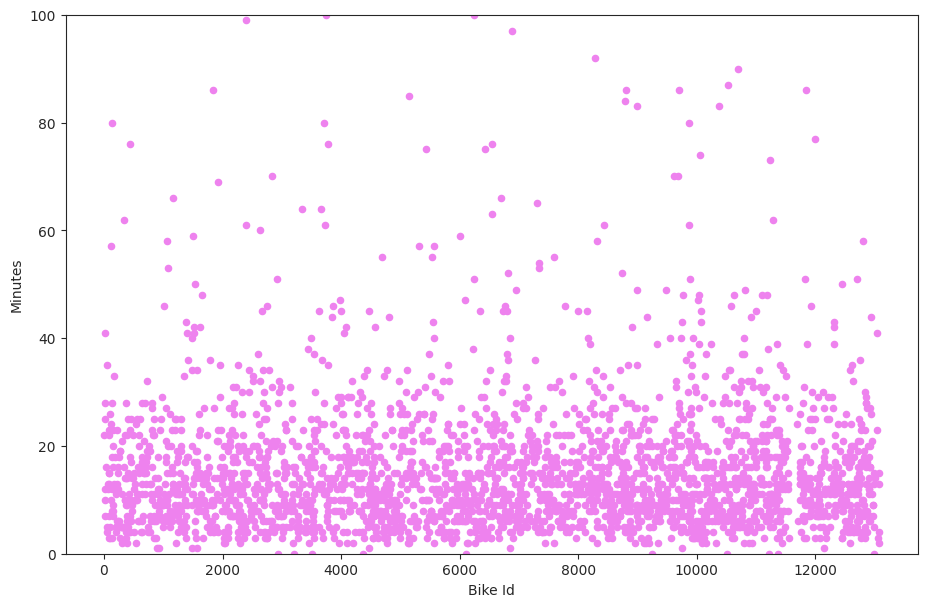

In [41]:
# Scatter plot (Minutes Vs Bike Id)
ax2= sample_autumn_pdf.plot(kind="scatter", y="Minutes", x="Bike Id", color="violet")
ax2.set_ylim([0, 100])
plt.show()

In [ ]:
# It is infered from the scatter plot of Autumn data that most of the ride happens under 40 minutes. 

<Axes: xlabel='Duration', ylabel='Count'>

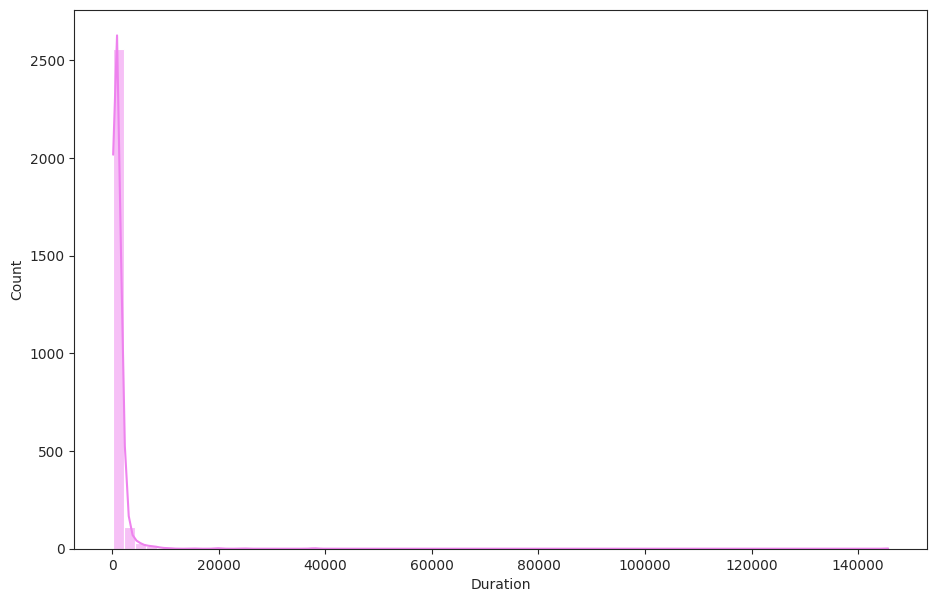

In [42]:
#A distribution plot of Autumn sample data where ride above 2 minutes is considered because the rides less than 2 mins are considered to be outliers. 

sns.histplot(x=sample_autumn_pdf.loc[sample_autumn_pdf['Duration']>128, 'Duration'], kde=True, bins=70, color="violet")

In [ ]:
#This plot again tells that the Autumn data has to be refined as it contains outliers. 

In [43]:
from statsmodels.distributions.empirical_distribution import ECDF
from matplotlib import pyplot

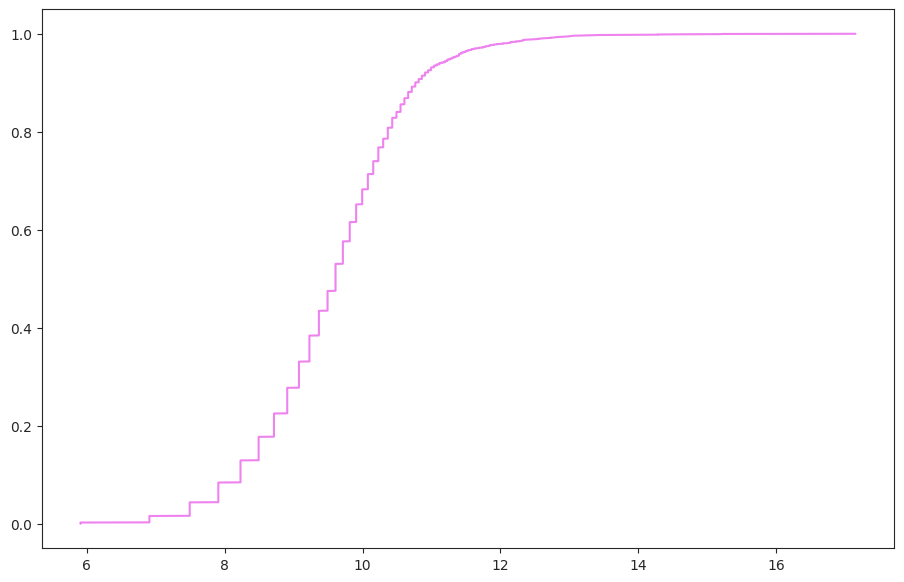

In [44]:
# Let's understand the peak (most riden) distribution of Autumn data which helps to refine the data. 
cdf = ECDF(np.log2(sample_autumn_pdf.loc[ sample_autumn_pdf[ 'Duration']>0, 'Duration']))
pyplot.plot(cdf.x, cdf.y, color="violet")
pyplot.show()

In [ ]:
# The results states that during Autumn season, most duration of rides happened roughly between 2 minutes - just above 1 hour. ((2^7) - (2^12))

In [48]:
totalautumn = autumn_df.count()
autumn_final_df = autumn_df.filter("Duration >= 128").filter("Duration <= 8192")[["Duration"]]
b= autumn_final_df.count()
print("After removing outliers, percentage of data considered for Autumn i.e, the data in the range of 2 mins to 2.3 hours:" ,(b*100)/totalautumn)

After removing outliers, percentage of data considered for Autumn i.e, the data in the range of 2 mins to 2.3 hours: 97.55708673859456


In [89]:
#To convert the column to interger type:

autumn_final_df = autumn_final_df.withColumn("Duration", autumn_final_df["Duration"].cast(IntegerType()))

In [90]:
autumn_final_df.printSchema()

root
 |-- Duration: integer (nullable = true)



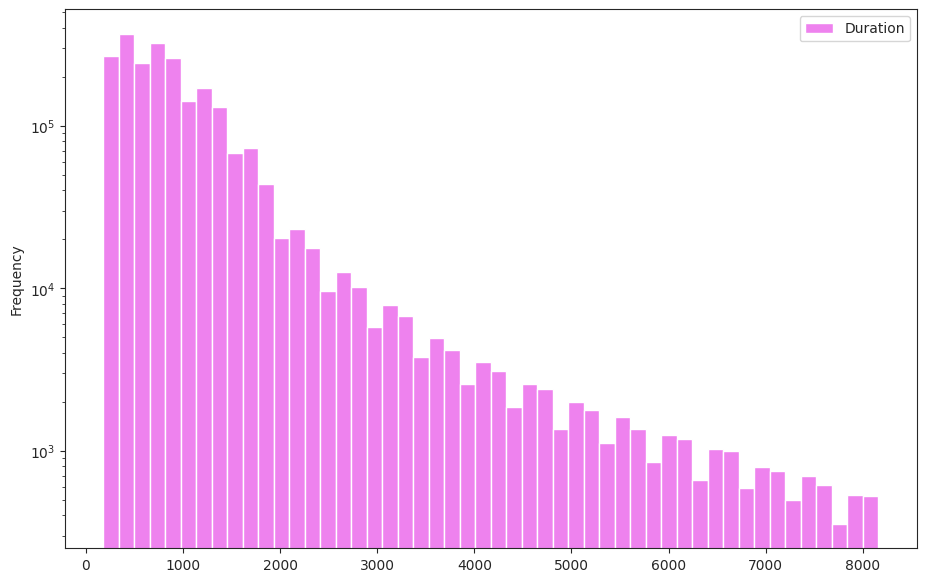

In [51]:
#A Hist plot to understand the skewness of Autumn data: 

autumn_final_pdf = autumn_final_df.toPandas()
autumn_final_pdf['Duration'] = autumn_final_pdf['Duration'].astype(int)
autumn_final_pdf.plot(kind="hist", bins=50, log=True, color = 'violet')
plt.show()

In [ ]:
# It is observed that more shorter rides that is less than 15 mins has happened during Autumn as well with an average of nearly 30 mins. 
# It is also seen that very less number of longer rides i.e, more than 1 hour just like Spring data.  

# Section 4: Sum of Duration of all valid rides: 

In [100]:
Total_duration_Spring = spring_final_df.groupBy().sum().collect()[0][0]

print("The sum of duration of all valid rides of Spring season is:" , Total_duration_Spring)

The sum of duration of all valid rides of Spring season is: 2924316720


In [101]:
Total_duration_Autumn = autumn_final_df.groupBy().sum().collect()[0][0]

print("The sum of duration of all valid rides of Autumn season is:" , Total_duration_Autumn)

The sum of duration of all valid rides of Autumn season is: 2188434480


# Conclusion:

In [ ]:
#  The First draft Research Hypothesis is: “In 2014, people ride for longer in Autumn than in Spring”

In [ ]:
# Based on the analysis, for the same valid duration of rides (2mins to 2.2hours), compared to Autumn, Spring season had more amount of rides.  

In [ ]:
# The percentage difference is 

In [102]:
Grand_Total = Total_duration_Spring + Total_duration_Autumn
Grand_Total

5112751200

In [112]:
x = Total_duration_Spring - Total_duration_Autumn
y = Total_duration_Spring + Total_duration_Autumn
z = y/2


In [113]:
x

735882240

In [114]:
y

5112751200

In [115]:
z

2556375600.0

In [116]:
Diff = (x/z) * 100
Diff

28.786154898364703

In [ ]:
# It has been found that there were 28.77% more rides happened during Spring compared to Autumn 2014 in London. 

In [ ]:
#Hence, The First draft Research Hypothesis: “In 2014, people ride for longer in Autumn than in Spring” DOES NOT HOLD TRUE. 